# Transformation of the "Rapporti di lavoro attivati" and "Rapporti di lavoro prorogati" datasets.
#### The input and output datasets can be found in the `DatasetsLocation.md` file in the `Datasets` folder.

If one wants to actually execute the instructions, it is necessary to insert the path of the input and output dataset. Then, the notebook can be run altogether.

In [1]:
activatedContractsPath = "<input_path>\\Rapporti_di_lavoro_attivati.csv"
activatedTranformedPath = "<output_path>\\Transformed_lavori_attivati.csv"
extendedContractsPath = "<input_path>\\Rapporti_di_lavoro_prorogati.csv"
extendededTranformedPath = "<output_path>\\Transformed_lavori_prorogati.csv"

All the necessary libraries are imported:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Create the data frames from the csv files

In [3]:
activatedContracts = pd.read_csv(activatedContractsPath)
'''create a backup of the original for confrontations later on'''
originalActivatedContracts = activatedContracts.copy(deep=True)
activatedContracts.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


In [4]:
extendedContracts = pd.read_csv(extendedContractsPath)
'''create a backup of the original for confrontations later on'''
originalExtendedContracts = extendedContracts.copy(deep=True)
extendedContracts.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,10/01/2020,F,48,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
1,01/03/2013,M,56,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,09/10/2018,M,58,Rifugi di montagna,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA
3,10/04/2017,M,41,Realizzazione di coperture,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,MAROCCO
4,03/01/2010,M,56,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [5]:
print("activatedContracts shape: ",activatedContracts.shape)
print("extendedContracts shape: ",extendedContracts.shape)

activatedContracts shape:  (9579794, 9)
extendedContracts shape:  (3413617, 9)


In [6]:
print("activatedContracts dtypes:\n",activatedContracts.dtypes, sep="")
print("")
print("extendedContracts dtypes:\n",extendedContracts.dtypes, sep="")

activatedContracts dtypes:
DATA                         object
GENERE                       object
ETA                           int64
SETTOREECONOMICODETTAGLIO    object
TITOLOSTUDIO                 object
CONTRATTO                    object
MODALITALAVORO               object
PROVINCIAIMPRESA             object
ITALIANO                     object
dtype: object

extendedContracts dtypes:
DATA                         object
GENERE                       object
ETA                           int64
SETTOREECONOMICODETTAGLIO    object
TITOLOSTUDIO                 object
CONTRATTO                    object
MODALITALAVORO               object
PROVINCIAIMPRESA             object
ITALIANO                     object
dtype: object


The type of the DATA column is changed in a Date format.

In [7]:
activatedContracts.DATA = activatedContracts.DATA.astype(np.datetime64)
activatedContracts.DATA 

0         2020-09-05
1         2019-12-07
2         2013-05-06
3         2010-12-03
4         2021-06-04
             ...    
9579789   2020-01-03
9579790   2010-06-09
9579791   2021-06-11
9579792   2010-02-02
9579793   2012-05-07
Name: DATA, Length: 9579794, dtype: datetime64[ns]

In [8]:
extendedContracts.DATA = extendedContracts.DATA.astype(np.datetime64)
extendedContracts.DATA

0         2020-10-01
1         2013-01-03
2         2018-09-10
3         2017-10-04
4         2010-03-01
             ...    
3413612   2018-04-09
3413613   2018-12-10
3413614   2017-01-10
3413615   2019-11-07
3413616   2021-04-07
Name: DATA, Length: 3413617, dtype: datetime64[ns]

In activatedContracts, there is one tuple that is set in the future (and in general after 2021). Considering the year, 
this is probably just a typo so we can correct it. 

In [9]:
futureDate = activatedContracts[activatedContracts.DATA > "2021/12/31"]
futureDate

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
5840160,2201-06-09,M,221,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,SIRIA


In [10]:
activatedContracts.loc[activatedContracts.DATA > "2021-12-31", ["ETA"]] = 221-(2201-2021)
activatedContracts.loc[activatedContracts.DATA > "2021-12-31", ["DATA"]] = np.datetime64("2021-06-09")
len(activatedContracts[activatedContracts.DATA > "2021-12-31"])

0

In [11]:
'''I know that the index is 5840160 and will call it directly to check if the transformation is correct'''
activatedContracts.iloc[5840160]

DATA                                                       2021-06-09 00:00:00
GENERE                                                                       M
ETA                                                                         41
SETTOREECONOMICODETTAGLIO    Attività di famiglie e convivenze come datori ...
TITOLOSTUDIO                                           NESSUN TITOLO DI STUDIO
CONTRATTO                               LAVORO DOMESTICO A TEMPO INDETERMINATO
MODALITALAVORO                                      TEMPO PARZIALE ORIZZONTALE
PROVINCIAIMPRESA                                                        MILANO
ITALIANO                                                                 SIRIA
Name: 5840160, dtype: object

In extendedContracts, there is no tuples after the 31st of December 2021.

In [12]:
len(extendedContracts[extendedContracts.DATA > "2021-12-31"])

0

By reading the data, and as shown in the following histograms, the data seems to be incomplete for the period before 2009.

The extended Contracts dataset only has very few tuples for the year 2008, while the activated contracts dataset has a small number
of tuples between 1973 and 2008.

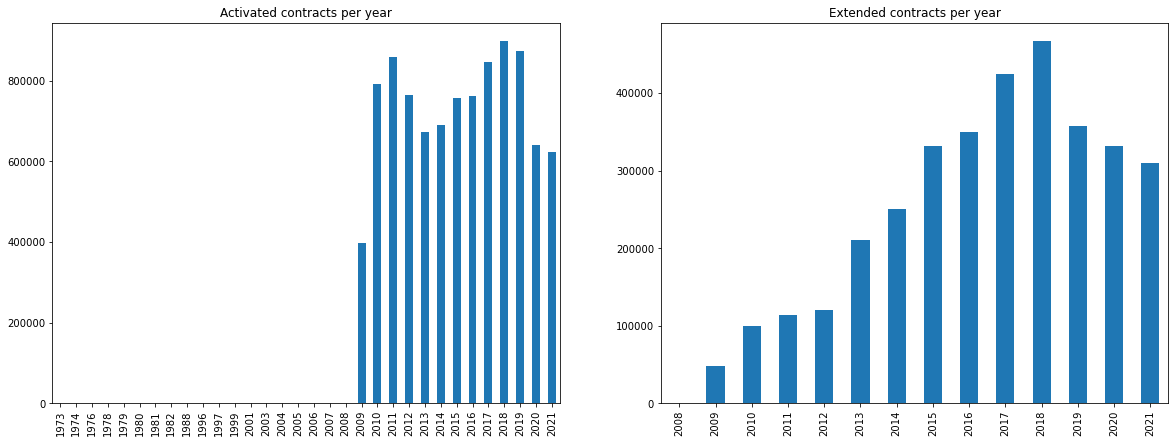

In [13]:
totalDates_activated = activatedContracts.DATA.astype('datetime64[Y]')
totalDates_activated = totalDates_activated.groupby(totalDates_activated).count()
totalDates_activated.index = totalDates_activated.index.year

totalDates_extended = extendedContracts.DATA.astype('datetime64[Y]')
totalDates_extended = totalDates_extended.groupby(totalDates_extended).count()
totalDates_extended.index = totalDates_extended.index.year

fig = plt.figure(figsize=(20, 7))

act = fig.add_subplot(121)
act.title.set_text('Activated contracts per year')
totalDates_activated.plot(kind="bar", xlabel='')

act = plt.subplot(122)
act.title.set_text('Extended contracts per year')
totalDates_extended.plot(kind="bar", xlabel='')

plt.show()

In [14]:
print("Number of activated contracts registered in 2008: ",
      len(activatedContracts[activatedContracts.DATA.between('2008-01-01','2008-12-31')]))

print("Number of activated contracts registered in 2007: ",
      len(activatedContracts[activatedContracts.DATA.between('2007-01-01','2007-12-31')]))

print("Number of extended contracts registered in 2008: ",
      len(extendedContracts[extendedContracts.DATA.between('2008-01-01','2008-12-31')]))

Number of activated contracts registered in 2008:  1590
Number of activated contracts registered in 2007:  6
Number of extended contracts registered in 2008:  6


Because of these results, I would exclude all contracts that have been activated before the year 2008. 
I will keep this last year because some of the contracts that have been extended in 2009 were supposedly activated in 2008.

In [15]:
contractsBefore2008 = len(activatedContracts[activatedContracts.DATA.between('1960-01-01','2007-12-31')])
print("Number of activated contracts before 2008: ",contractsBefore2008)

Number of activated contracts before 2008:  66


In [16]:
originalLength = len(activatedContracts)
activatedContracts = activatedContracts[activatedContracts.DATA.between('2008-01-01','2021-12-31')]
print("Number of dropped rows: ",originalLength - len(activatedContracts))

Number of dropped rows:  66


Since the two datasets come from the same source, they consider the same types of contracts. In our test case, we only need
to know which type of contracts are extendable and which are not. We can consider all the contract types in the extendedContracts
dataframe to be "extendable", making the rest "not extendable". 

The values for the column "CONTRATTO" in activatedContracts will
be changed into "PROROGABILE" and "NON PROROGABILE".

This is not be done for extendedContracts because all values would be "PROROGABILE" and in general could be useful in the future.

In [17]:
extendableContractsList = extendedContracts.CONTRATTO.unique()
condition = activatedContracts.CONTRATTO.isin(extendableContractsList)
activatedContracts.loc[-condition,'CONTRATTO'] = "NON PROROGABILE"
activatedContracts.loc[condition,'CONTRATTO'] = "PROROGABILE"

activatedContracts[activatedContracts.CONTRATTO != "PROROGABILE"]

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
80,2009-06-10,F,24,Bar e altri esercizi simili senza cucina,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON PROROGABILE,TEMPO PARZIALE MISTO,LECCO,ITALIA
87,2011-08-11,F,36,Ristorazione con somministrazione,LICENZA MEDIA,NON PROROGABILE,NON DEFINITO,LECCO,ITALIA
141,2011-11-11,F,28,Coltivazioni agricole associate all'allevament...,NESSUN TITOLO DI STUDIO,NON PROROGABILE,TEMPO PIENO,LECCO,UCRAINA
154,2011-04-01,F,34,Alberghi,TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCO...,NON PROROGABILE,NON DEFINITO,LECCO,ITALIA
185,2009-09-08,F,52,Istruzione secondaria di primo grado: scuole m...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,NON PROROGABILE,TEMPO PIENO,LECCO,ITALIA
...,...,...,...,...,...,...,...,...,...
9579682,2012-11-07,F,39,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,NON PROROGABILE,TEMPO PARZIALE ORIZZONTALE,BRESCIA,NIGERIA
9579704,2009-06-10,M,36,Ristorazione con somministrazione,LICENZA MEDIA,NON PROROGABILE,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIA
9579710,2010-02-12,F,38,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,NON PROROGABILE,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIA
9579744,2010-10-12,F,48,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,NON PROROGABILE,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ROMANIA


When talking about italian labour market, we are usually interested only in dividing italians from foreigners. For this reason,
the "ITALIANO" column is substituted by a "CITTADINANZA" column containing the values "ITALIANO" and "STRANIERO"

In [18]:
activatedContracts.rename(columns={"ITALIANO":"CITTADINANZA"}, inplace=True)
condition = activatedContracts.CITTADINANZA == "ITALIA"
activatedContracts.loc[-condition, 'CITTADINANZA'] = "STRANIERO"
activatedContracts.loc[condition, 'CITTADINANZA'] = "ITALIANO"
activatedContracts

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,2020-09-05,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,PROROGABILE,TEMPO PIENO,BERGAMO,STRANIERO
1,2019-12-07,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,PROROGABILE,TEMPO PIENO,BERGAMO,ITALIANO
2,2013-05-06,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,PROROGABILE,TEMPO PIENO,BERGAMO,ITALIANO
3,2010-12-03,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,PROROGABILE,NON DEFINITO,BERGAMO,ITALIANO
4,2021-06-04,F,49,Rifugi di montagna,LICENZA MEDIA,PROROGABILE,NON DEFINITO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...,...
9579789,2020-01-03,M,52,Lavori di meccanica generale,LICENZA MEDIA,PROROGABILE,TEMPO PIENO,BERGAMO,ITALIANO
9579790,2010-06-09,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,PROROGABILE,TEMPO PIENO,BERGAMO,STRANIERO
9579791,2021-06-11,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,PROROGABILE,TEMPO PIENO,BERGAMO,STRANIERO
9579792,2010-02-02,M,35,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,PROROGABILE,TEMPO PIENO,BERGAMO,STRANIERO


Now the same thing for extendedContracts

In [19]:
extendedContracts.rename(columns={"ITALIANO":"CITTADINANZA"},inplace=True)
condition = extendedContracts.CITTADINANZA == "ITALIA"
extendedContracts.loc[-condition, 'CITTADINANZA'] = "STRANIERO"
extendedContracts.loc[condition, 'CITTADINANZA'] = "ITALIANO"
extendedContracts

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,2020-10-01,F,48,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
1,2013-01-03,M,56,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
2,2018-09-10,M,58,Rifugi di montagna,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
3,2017-10-04,M,41,Realizzazione di coperture,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,STRANIERO
4,2010-03-01,M,56,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...,...
3413612,2018-04-09,F,50,Installazione di altre macchine ed apparecchia...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO
3413613,2018-12-10,F,52,Mense,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO
3413614,2017-01-10,F,37,Servizi integrati di gestione agli edifici,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIANO
3413615,2019-11-07,M,36,Installazione di impianti elettrici in edifici...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIANO


Since we want to consider the education degree of a person, we check whether the values are the same in the two datasets:

In [20]:
activatedContracts.TITOLOSTUDIO.unique().tolist()

['NESSUN TITOLO DI STUDIO',
 'LICENZA MEDIA',
 "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA",
 'LAUREA - Vecchio o nuovo ordinamento',
 "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()",
 'LICENZA ELEMENTARE',
 'DIPLOMA DI SPECIALIZZAZIONE',
 'DIPLOMA UNIVERSITARIO',
 'TITOLO DI DOTTORE DI RICERCA',
 'TITOLO DI STUDIO POST-LAUREA',
 'MASTER UNIVERSITARIO DI PRIMO LIVELLO',
 'DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO',
 nan]

In [21]:
extendedContracts.TITOLOSTUDIO.unique().tolist()

['LICENZA MEDIA',
 'NESSUN TITOLO DI STUDIO',
 "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA",
 'LAUREA - Vecchio o nuovo ordinamento',
 "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()",
 'DIPLOMA UNIVERSITARIO',
 'DIPLOMA DI SPECIALIZZAZIONE',
 'LICENZA ELEMENTARE',
 'DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO',
 'TITOLO DI DOTTORE DI RICERCA',
 'MASTER UNIVERSITARIO DI PRIMO LIVELLO',
 'TITOLO DI STUDIO POST-LAUREA',
 nan]

The values are the same, but we can see that some tuples have no value at all. It may be possible to predict the degree by
analyzing the values of the other attributes (via means and modes), but I think it is better to just eliminate them.

In [22]:
conditionA = activatedContracts.TITOLOSTUDIO.isna()
conditionE = extendedContracts.TITOLOSTUDIO.isna()
print("Number of tuples without a 'TITOLOSTUDIO' value")
print("For activatedContracts: ", len(activatedContracts[conditionA]))
print("For extendedContracts: ", len(extendedContracts[conditionE]))

Number of tuples without a 'TITOLOSTUDIO' value
For activatedContracts:  580
For extendedContracts:  160


In [23]:
originalLengthA = len(activatedContracts)
originalLengthE = len(extendedContracts)
activatedContracts = activatedContracts[-conditionA]
extendedContracts = extendedContracts[-conditionE]
print("Number of dropped rows in activatedContrats: ", originalLengthA-len(activatedContracts))
print("Number of dropped rows in extendedContracts: ", originalLengthE-len(extendedContracts))

Number of dropped rows in activatedContrats:  580
Number of dropped rows in extendedContracts:  160


Since I also want to classify people by gender and age, I check for invalid values for GENERE and ETA

In [24]:
activatedContracts.GENERE.unique().tolist()

['F', 'M']

In [25]:
extendedContracts.GENERE.unique().tolist()

['F', 'M']

In [26]:
activatedContracts.ETA.describe()

count    9.579148e+06
mean     3.530186e+01
std      1.178231e+01
min      0.000000e+00
25%      2.500000e+01
50%      3.400000e+01
75%      4.400000e+01
max      1.010000e+02
Name: ETA, dtype: float64

In [27]:
extendedContracts.ETA.describe()

count    3.413457e+06
mean     3.525824e+01
std      1.154975e+01
min      0.000000e+00
25%      2.500000e+01
50%      3.400000e+01
75%      4.400000e+01
max      1.000000e+02
Name: ETA, dtype: float64

For the ETA attribute, the values range from 0 to 100(or 101 depending on the dataset).

In [28]:
activatedContracts[activatedContracts.ETA < 15]['ETA'].unique().tolist()

[4, 8, 5, 1, 0, 12, 6, 9, 13, 7, 10, 14, 3, 11, 2]

In [29]:
extendedContracts[extendedContracts.ETA < 15]['ETA'].unique().tolist()

[11, 0, 1, 7, 9, 5, 14, 8, 13, 2, 3, 10, 6, 4, 12]

For the same reasons explained for the education degree attribute, I would drop all tuples with an age lower than 15. 

In [30]:
conditionA = activatedContracts.ETA < 15
conditionE = extendedContracts.ETA < 15
print("Number of tuples without a 'ETA' value lower than 15")
print("For activatedContracts: ", len(activatedContracts[conditionA]))
print("For extendedContracts: ", len(extendedContracts[conditionE]))

Number of tuples without a 'ETA' value lower than 15
For activatedContracts:  12162
For extendedContracts:  1284


In [31]:
originalLengthA = len(activatedContracts)
originalLengthE = len(extendedContracts)
activatedContracts = activatedContracts[-conditionA]
extendedContracts = extendedContracts[-conditionE]
print("Number of dropped rows in activatedContrats: ", originalLengthA-len(activatedContracts))
print("Number of dropped rows in extendedContracts: ", originalLengthE-len(extendedContracts))

Number of dropped rows in activatedContrats:  12162
Number of dropped rows in extendedContracts:  1284


In total, we removed `66 + 580 + 12162 = 12808` rows  from activatedContracts, which equals to the 0.13% of the total 
rows of the original dataset, and `160 + 1284 = 1444` rows from extendedContracts, which is the 0.04% of the original datset.

Here below we have the percentage of removed row per education degree (the first list refers to activatedContracts and the second to extendedContracts), which is lower than 1% for all cases in both datasets

In [32]:
100 - ((activatedContracts.TITOLOSTUDIO.groupby(activatedContracts.TITOLOSTUDIO).count() / originalActivatedContracts.TITOLOSTUDIO.groupby(originalActivatedContracts.TITOLOSTUDIO).count())*100)

TITOLOSTUDIO
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          0.080057
DIPLOMA DI SPECIALIZZAZIONE                                                                                                0.053641
DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO                                                                                      0.027882
DIPLOMA UNIVERSITARIO                                                                                                      0.055042
LAUREA - Vecchio o nuovo ordinamento                                                                                       0.065576
LICENZA ELEMENTARE                                                                                                         0.639457
LICENZA MEDIA                                                                                                              0.065191
MASTER UNIVERSITARIO DI PRIMO LIVELLO                          

In [33]:
100 - ((extendedContracts.TITOLOSTUDIO.groupby(extendedContracts.TITOLOSTUDIO).count() / originalExtendedContracts.TITOLOSTUDIO.groupby(originalExtendedContracts.TITOLOSTUDIO).count())*100)

TITOLOSTUDIO
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          0.039638
DIPLOMA DI SPECIALIZZAZIONE                                                                                                0.041761
DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO                                                                                      0.069348
DIPLOMA UNIVERSITARIO                                                                                                      0.026220
LAUREA - Vecchio o nuovo ordinamento                                                                                       0.052379
LICENZA ELEMENTARE                                                                                                         0.046733
LICENZA MEDIA                                                                                                              0.021752
MASTER UNIVERSITARIO DI PRIMO LIVELLO                          

In [34]:
print("Final lenght of activatedContracts: ", len(activatedContracts))

print("Final lenght of extendedContracts: ", len(extendedContracts))

Final lenght of activatedContracts:  9566986
Final lenght of extendedContracts:  3412173


Finally, I would change the content of the ETA column by grouping the age values into four main categories:
- 15-24
- 25-49
- 50-64
- 65 o piu'

It is common when talking about labour market to consider age groups instead of the actual age.

In [35]:
'''First the age values are substituted with values 0,1,2,3 (from "15-24" to "65 o piu'"), then they are changed with the
actual names'''
#For activatedContracts
activatedContracts.loc[activatedContracts.ETA < 25, 'ETA'] = 0
activatedContracts.loc[(activatedContracts.ETA > 24) & (activatedContracts.ETA < 50), 'ETA'] = 1
activatedContracts.loc[(activatedContracts.ETA > 49) & (activatedContracts.ETA < 65), 'ETA'] = 2
activatedContracts.loc[activatedContracts.ETA > 64, 'ETA'] = 3

activatedContracts = activatedContracts.replace({0:"15-24", 1:"25-49", 2:"50-64", 3:"65 o piu'"})
activatedContracts

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,2020-09-05,F,50-64,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,PROROGABILE,TEMPO PIENO,BERGAMO,STRANIERO
1,2019-12-07,M,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,PROROGABILE,TEMPO PIENO,BERGAMO,ITALIANO
2,2013-05-06,F,15-24,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,PROROGABILE,TEMPO PIENO,BERGAMO,ITALIANO
3,2010-12-03,F,25-49,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,PROROGABILE,NON DEFINITO,BERGAMO,ITALIANO
4,2021-06-04,F,25-49,Rifugi di montagna,LICENZA MEDIA,PROROGABILE,NON DEFINITO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...,...
9579789,2020-01-03,M,50-64,Lavori di meccanica generale,LICENZA MEDIA,PROROGABILE,TEMPO PIENO,BERGAMO,ITALIANO
9579790,2010-06-09,M,50-64,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,PROROGABILE,TEMPO PIENO,BERGAMO,STRANIERO
9579791,2021-06-11,M,25-49,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,PROROGABILE,TEMPO PIENO,BERGAMO,STRANIERO
9579792,2010-02-02,M,25-49,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,PROROGABILE,TEMPO PIENO,BERGAMO,STRANIERO


In [36]:
#For extendedContracts
extendedContracts.loc[extendedContracts.ETA < 25, 'ETA'] = 0
extendedContracts.loc[(extendedContracts.ETA > 24) & (extendedContracts.ETA < 50), 'ETA'] = 1
extendedContracts.loc[(extendedContracts.ETA > 49) & (extendedContracts.ETA < 65), 'ETA'] = 2
extendedContracts.loc[extendedContracts.ETA > 64, 'ETA'] = 3

extendedContracts = extendedContracts.replace({0:"15-24", 1:"25-49", 2:"50-64", 3:"65 o piu'"})
extendedContracts

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,CITTADINANZA
0,2020-10-01,F,25-49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIANO
1,2013-01-03,M,50-64,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
2,2018-09-10,M,50-64,Rifugi di montagna,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIANO
3,2017-10-04,M,25-49,Realizzazione di coperture,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,STRANIERO
4,2010-03-01,M,50-64,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIANO
...,...,...,...,...,...,...,...,...,...
3413612,2018-04-09,F,50-64,Installazione di altre macchine ed apparecchia...,LICENZA ELEMENTARE,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO
3413613,2018-12-10,F,50-64,Mense,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,MONZA E BRIANZA,ITALIANO
3413614,2017-01-10,F,25-49,Servizi integrati di gestione agli edifici,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,ITALIANO
3413615,2019-11-07,M,25-49,Installazione di impianti elettrici in edifici...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BRESCIA,ITALIANO


One last thing that could be done is remove the PROVINCIAIMPRESA and MODALITALAVORO since i do not intend to use them.
I would prefer not to do it since I could use them in the future but I will do it so that the dimension of the final dataset is somewhat reduced.

If I decide to use them in the future, I could just delete this last command. 

In [37]:
activatedContracts.drop(columns=['MODALITALAVORO', 'PROVINCIAIMPRESA'], inplace=True)
extendedContracts.drop(columns=['MODALITALAVORO', 'PROVINCIAIMPRESA'], inplace=True)
activatedContracts

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,CITTADINANZA
0,2020-09-05,F,50-64,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,PROROGABILE,STRANIERO
1,2019-12-07,M,25-49,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,PROROGABILE,ITALIANO
2,2013-05-06,F,15-24,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,PROROGABILE,ITALIANO
3,2010-12-03,F,25-49,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,PROROGABILE,ITALIANO
4,2021-06-04,F,25-49,Rifugi di montagna,LICENZA MEDIA,PROROGABILE,ITALIANO
...,...,...,...,...,...,...,...
9579789,2020-01-03,M,50-64,Lavori di meccanica generale,LICENZA MEDIA,PROROGABILE,ITALIANO
9579790,2010-06-09,M,50-64,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,PROROGABILE,STRANIERO
9579791,2021-06-11,M,25-49,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,PROROGABILE,STRANIERO
9579792,2010-02-02,M,25-49,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,PROROGABILE,STRANIERO


The next istructions will export the new datasets as csv to the previously indicated paths.

In [38]:
activatedContracts.to_csv(activatedTranformedPath, index=False)
extendedContracts.to_csv(extendededTranformedPath, index=False)
print("done")

done
